### This notebook guides the user regarding how to fetch timeseries data for a specific/all location at runtime.

#### Note: The users AWS credentials should be exported in the created environment.

In [2]:
# import package
import pandas as pd
import matplotlib.pyplot as plt
from windwatts_data import WTKLedClient1224
from windrose import WindroseAxes

We have imported WTKLedClient1224 class to work with WTK hourly average data.

In [3]:
# Initialize object to the WTKLedClient1224 and WTKLedClientHourly
# Since the config file is in same directory "notebooks" as the ".ipynb" file, the below config path works.
wtk_1224_client = WTKLedClient1224(config_path='./1224_config.json')

Fetching results...: 3polls [00:03,  1.25s/polls]


### Safe function for fetching timeseries.

In [3]:
# Fetching windspeed and winddirection timeseries at height 100m for a single location for year 2001.
df = wtk_1224_client.fetch_timeseries_1224(lat=39.92824,long=-105.23437,heights=[100],years=[2001])
print(df)

Fetching results...: 1polls [00:00,  1.61polls/s]


     winddirection_100m  windspeed_100m  year  mohr   index
0                304.61            8.46  2001   101  0f1c63
1                295.51            9.20  2001   102  0f1c63
2                291.72            9.69  2001   103  0f1c63
3                294.93            9.37  2001   104  0f1c63
4                289.00            9.98  2001   105  0f1c63
..                  ...             ...   ...   ...     ...
283              236.85            6.57  2001  1220  0f1c63
284              213.33            6.31  2001  1221  0f1c63
285              209.64            6.54  2001  1222  0f1c63
286              291.12            6.44  2001  1223  0f1c63
287              257.97            8.08  2001  1224  0f1c63

[288 rows x 5 columns]


In 1224 timeseries data, each file has 288 rows(24 hours * 12 months)[hourly averages for each month] for each location at a specific year. mohr stands for MMHH.

In [4]:
# parsing mohr column in datetime to plot timeseries data.
df['month'],df['hour'] = df['mohr']//100, df['mohr']%100
df['datetime'] = pd.to_datetime(dict(year=df['year'],month=df['month'],day=1,hour=df['hour']))
df = df.sort_values('datetime')

In [5]:
print(df)

     winddirection_100m  windspeed_100m  year  mohr   index  month  hour  \
0                304.61            8.46  2001   101  0f1c63      1     1   
1                295.51            9.20  2001   102  0f1c63      1     2   
2                291.72            9.69  2001   103  0f1c63      1     3   
3                294.93            9.37  2001   104  0f1c63      1     4   
4                289.00            9.98  2001   105  0f1c63      1     5   
..                  ...             ...   ...   ...     ...    ...   ...   
283              236.85            6.57  2001  1220  0f1c63     12    20   
284              213.33            6.31  2001  1221  0f1c63     12    21   
285              209.64            6.54  2001  1222  0f1c63     12    22   
286              291.12            6.44  2001  1223  0f1c63     12    23   
287              257.97            8.08  2001  1224  0f1c63     12    24   

               datetime  
0   2001-01-01 01:00:00  
1   2001-01-01 02:00:00  
2   2001-

### plotting timeseries data

Text(0.5, 1.0, 'Windspeed in 2001 at Coordinates(39.92824,-105.23437)')

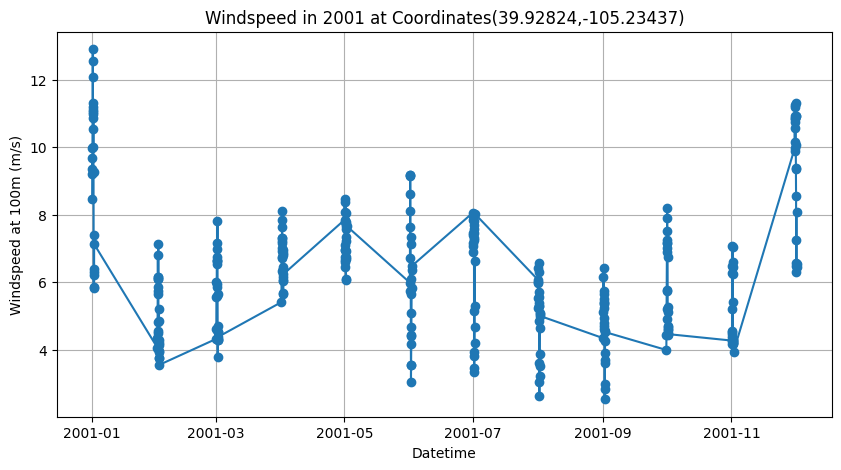

In [6]:
plt.figure(figsize=(10,5))
plt.plot(df['datetime'],df['windspeed_100m'],marker='o')
plt.ylabel("Windspeed at 100m (m/s)")
plt.xlabel("Datetime")
plt.grid(True)
plt.title("Windspeed in 2001 at Coordinates(39.92824,-105.23437)")

In [7]:
# Windspeed statistics
agg = df.reset_index().pivot(index="month",columns="hour",values="windspeed_100m")
agg

hour,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
month,,,,,,,,,,,,,,,,,,,,,
1,8.46,9.20,9.69,9.37,9.98,10.86,12.09,12.91,12.57,11.21,...,10.98,11.06,9.26,7.39,5.86,6.38,6.31,6.22,5.84,7.13
2,4.06,4.34,4.54,4.81,6.10,6.11,6.82,6.15,5.64,5.74,...,4.86,5.20,4.21,3.96,4.15,4.29,3.76,3.92,3.76,3.55
3,4.32,4.62,5.57,6.00,5.95,5.58,5.87,6.99,6.64,6.63,...,7.82,5.65,4.33,3.78,4.29,4.53,4.28,4.51,4.70,4.38
4,5.41,6.33,7.15,7.30,7.23,7.31,7.64,8.11,7.86,6.93,...,6.46,6.07,6.95,6.88,6.15,5.69,5.65,6.05,6.40,6.24
5,7.85,8.38,7.79,6.59,6.45,6.75,6.65,6.97,7.09,6.96,...,7.57,6.06,6.10,6.75,6.93,6.69,7.34,7.22,8.04,7.67
6,5.99,5.74,6.72,8.62,9.14,9.19,9.18,8.11,7.65,7.12,...,3.04,3.54,3.54,4.16,4.42,4.68,5.10,5.84,6.35,6.48
7,8.06,7.08,7.17,7.45,7.84,6.91,7.96,7.41,7.82,7.47,...,5.14,3.47,3.34,3.82,3.92,4.21,4.67,6.63,5.30,8.03
8,6.07,6.00,5.97,5.25,6.43,5.53,5.70,6.29,6.57,5.57,...,3.61,2.63,3.04,3.22,3.53,3.86,5.10,4.65,5.07,5.00
9,4.34,5.13,6.14,5.66,6.42,5.23,5.49,5.37,4.61,4.78,...,4.70,2.83,2.53,2.98,3.70,3.61,3.91,4.54,4.25,4.52


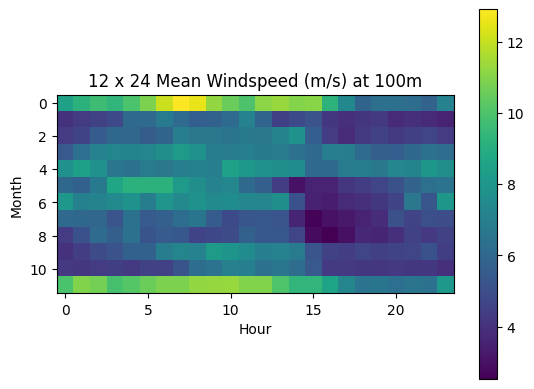

In [8]:
plt.imshow(agg)
plt.xlabel("Hour")
plt.ylabel("Month")
plt.title("12 x 24 Mean Windspeed (m/s) at 100m")
plt.colorbar()

### plotting windrose for winddirection and windspeed at 100m

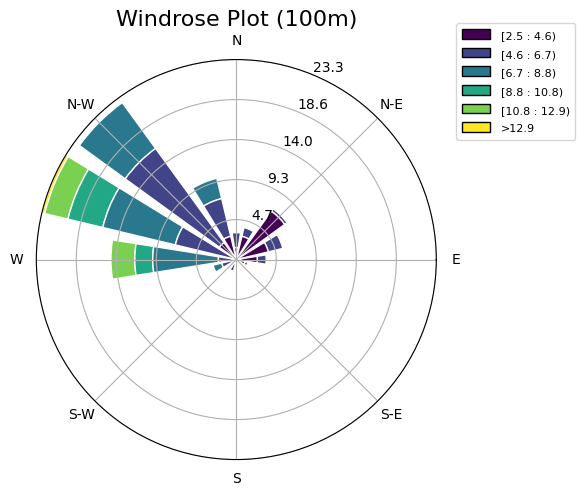

In [9]:
fig = plt.figure(figsize=(5, 5))  # Width=10, Height=8 in inches
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(df['winddirection_100m'], df['windspeed_100m'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(loc=(1.05, 0.8)) 
plt.suptitle("Windrose Plot (100m)", fontsize=16, y=1)  
plt.show()

### Fetching windspeed and winddirection timeseries at height 100m for a single location for all 10 years.

In [10]:
df = wtk_1224_client.fetch_timeseries_1224(lat=39.92824,long=-105.23437,heights=[100], years=[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010])

Fetching results...: 1polls [00:00,  1.59polls/s]


In [11]:
df

,winddirection_100m,windspeed_100m,year,mohr,index
0,315.81,6.28,2004,101,0f1c63
1,316.53,6.32,2004,102,0f1c63
2,308.08,6.65,2004,103,0f1c63
3,318.11,7.20,2004,104,0f1c63
4,312.66,7.56,2004,105,0f1c63
...,...,...,...,...,...
2875,303.29,5.72,2007,1220,0f1c63
2876,31.60,6.08,2007,1221,0f1c63
2877,85.07,5.98,2007,1222,0f1c63
2878,332.10,4.91,2007,1223,0f1c63


In [12]:
# parsing mohr column in datetime to plot timeseries data.
df['month'],df['hour'] = df['mohr']//100, df['mohr']%100
df['datetime'] = pd.to_datetime(dict(year=df['year'],month=df['month'],day=1,hour=df['hour']))
df = df.sort_values('datetime')

### plotting timeseries data for march of all 10 years.

Text(0.5, 1.0, 'Windspeed in March 2001-2010 at Coordinates(39.92824,-105.23437)')

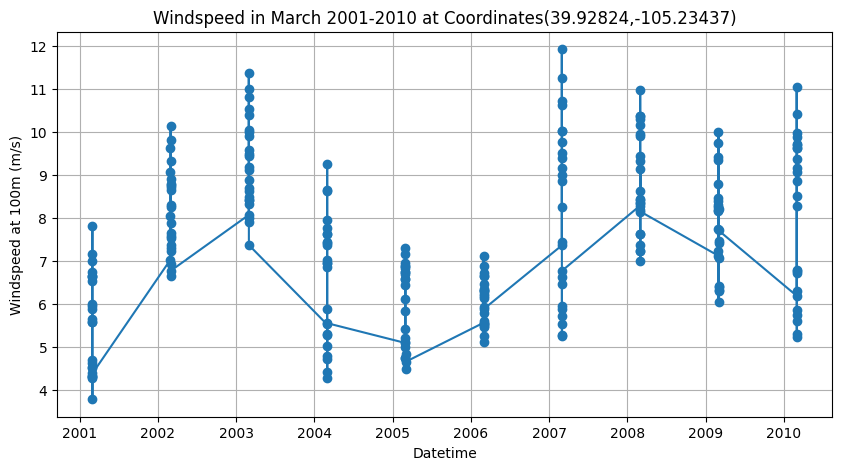

In [13]:
df_march = df[df['month']==3]
plt.figure(figsize=(10,5))
plt.plot(df_march['datetime'],df_march['windspeed_100m'],marker='o')
plt.ylabel("Windspeed at 100m (m/s)")
plt.xlabel("Datetime")
plt.grid(True)
plt.title("Windspeed in March 2001-2010 at Coordinates(39.92824,-105.23437)")

In [14]:
df

,winddirection_100m,windspeed_100m,year,mohr,index,month,hour,datetime
1440,304.61,8.46,2001,101,0f1c63,1,1,2001-01-01 01:00:00
1441,295.51,9.20,2001,102,0f1c63,1,2,2001-01-01 02:00:00
1442,291.72,9.69,2001,103,0f1c63,1,3,2001-01-01 03:00:00
1443,294.93,9.37,2001,104,0f1c63,1,4,2001-01-01 04:00:00
1444,289.00,9.98,2001,105,0f1c63,1,5,2001-01-01 05:00:00
...,...,...,...,...,...,...,...,...
2299,324.16,6.30,2010,1220,0f1c63,12,20,2010-12-01 20:00:00
2300,294.56,6.43,2010,1221,0f1c63,12,21,2010-12-01 21:00:00
2301,308.61,7.08,2010,1222,0f1c63,12,22,2010-12-01 22:00:00
2302,304.40,6.25,2010,1223,0f1c63,12,23,2010-12-01 23:00:00


#### Fetching windspeed and winddirection timeseries dataframe at height 100m and 40m for a 2 locations(the second one as the nearest neighbor) for years 2001 and 2004.

In [4]:
df = wtk_1224_client.fetch_timeseries_1224(lat=39.92824,long=-105.23437,heights=[100,40],years=[2001,2004],n_nearest=2)

Fetching results...: 1polls [00:00,  1.61polls/s]


In [5]:
df

,winddirection_100m,winddirection_40m,windspeed_100m,windspeed_40m,year,mohr,index
0,304.61,305.85,8.46,6.54,2001,101,0f1c63
1,295.51,292.57,9.20,7.33,2001,102,0f1c63
2,291.72,288.00,9.69,8.06,2001,103,0f1c63
3,294.93,282.34,9.37,8.08,2001,104,0f1c63
4,289.00,282.48,9.98,8.56,2001,105,0f1c63
...,...,...,...,...,...,...,...
1147,333.50,6.35,5.23,4.52,2001,1220,0f1c64
1148,203.44,149.45,5.73,5.07,2001,1221,0f1c64
1149,244.67,236.84,6.05,5.24,2001,1222,0f1c64
1150,293.86,341.04,5.64,4.41,2001,1223,0f1c64


In [6]:
df['index'].value_counts()

index
0f1c63    576
0f1c64    576
Name: count, dtype: int64

Each index maps to an unique coordinate on the grid. We have 2 unique indexes here because user requested data for 2 nearest locations.


#### Location gdf for the wtk data

In [7]:
loc_gdf = wtk_1224_client.get_location_gdf()
print(loc_gdf)

          index   latitude   longitude                     geometry
0        000000  50.982258 -162.061630  POINT (-162.06163 50.98226)
1        000001  51.010925 -162.099060  POINT (-162.09906 51.01092)
2        000002  51.039566 -162.136520  POINT (-162.13652 51.03957)
3        000003  51.068195 -162.174010   POINT (-162.17401 51.0682)
4        000004  51.096817 -162.211580  POINT (-162.21158 51.09682)
...         ...        ...         ...                          ...
2599772  27ab5c  20.954578  -61.076538   POINT (-61.07654 20.95458)
2599773  27ab5d  20.983326  -61.056640   POINT (-61.05664 20.98333)
2599774  27ab5e  21.012074  -61.036743   POINT (-61.03674 21.01207)
2599775  27ab5f  21.040829  -61.016785   POINT (-61.01678 21.04083)
2599776  27ab60  21.069584  -60.996857   POINT (-60.99686 21.06958)

[2599777 rows x 4 columns]


In [8]:
# Retrieving coordinates from index values
print(loc_gdf.loc[loc_gdf['index'] == '0f1c63'])
print(loc_gdf.loc[loc_gdf['index'] == '0f1c64'])

         index   latitude  longitude                     geometry
990307  0f1c63  39.913254 -105.23915  POINT (-105.23915 39.91325)
         index   latitude  longitude                    geometry
990308  0f1c64  39.950325  -105.2381  POINT (-105.2381 39.95032)


#### Fetching windspeed and winddirection timeseries dataframe at height 20m for a 2 locations(the second one as the nearest neighbor) for year 2001.


In [9]:
df = wtk_1224_client.fetch_timeseries_1224(lat=39.92824,long=-105.23437,heights=[20],years=[2001,2004],n_nearest=2)

Fetching results...: 1polls [00:00,  1.60polls/s]


In [10]:
df['year'].value_counts()

year
2004    576
2001    576
Name: count, dtype: int64

In [11]:
df['index'].value_counts()

index
0f1c64    576
0f1c63    576
Name: count, dtype: int64

We have 576 records because we have data for 2 location per year. 


Note: If you print the columns using wtk_1224_client.get_column_names(), the height 20m doesn't exist in the data. So, the data at the adjacent heights will be fetched.
